In [217]:
!pip install --upgrade numpy==1.24.3
!pip install --upgrade pandas==2.2.0
!pip install --upgrade scikit-learn==1.4.1.post1

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.24.3.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\lokna\AppData\Roaming\Python\Python312\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\lokna\AppData\Roaming\Python\Python312\site-packages\pip\_internal\cli\req_command.py", line 245, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lokna\AppData\Roaming\Python\Python312\site-packages\pip\_internal\commands\install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "C:\Users\lokna\AppData\Roaming\Python\Python312\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "C:\Users\lokna\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\resolvelib\resolvers.py", line 54

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [218]:
import pandas as pd
df = pd.read_csv('C:\\Users\\lokna\\updated_insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   float64
 1   sex                  1338 non-null   int64  
 2   bmi                  1338 non-null   float64
 3   children             1338 non-null   float64
 4   smoker               1338 non-null   int64  
 5   charges              1338 non-null   float64
 6   avg_steps_per_day    1338 non-null   float64
 7   gym_frequency        1338 non-null   int64  
 8   time_spent_in_gym    1338 non-null   int64  
 9   region_northeast     1338 non-null   bool   
 10  region_northwest     1338 non-null   bool   
 11  region_southeast     1338 non-null   bool   
 12  region_southwest     1338 non-null   bool   
 13  occupation_Artist    1338 non-null   bool   
 14  occupation_Doctor    1338 non-null   bool   
 15  occupation_Engineer  1338 non-null   b

In [219]:
X= df.drop('charges', axis=1)
y= df['charges']
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   float64
 1   sex                  1338 non-null   int64  
 2   bmi                  1338 non-null   float64
 3   children             1338 non-null   float64
 4   smoker               1338 non-null   int64  
 5   avg_steps_per_day    1338 non-null   float64
 6   gym_frequency        1338 non-null   int64  
 7   time_spent_in_gym    1338 non-null   int64  
 8   region_northeast     1338 non-null   bool   
 9   region_northwest     1338 non-null   bool   
 10  region_southeast     1338 non-null   bool   
 11  region_southwest     1338 non-null   bool   
 12  occupation_Artist    1338 non-null   bool   
 13  occupation_Doctor    1338 non-null   bool   
 14  occupation_Engineer  1338 non-null   bool   
 15  occupation_Other     1338 non-null   b

In [220]:
#1st question
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
 
print(df.shape)
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=0,test_size=0.25)
mean_age = X_train['age'].mean()
print(mean_age)


(1338, 18)
39.16151545363908


In [221]:
#2nd question
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
# transform both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# convert scaled numpy arrays to dataframes with the same feature names as X
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
#perform mean age on X_test dataframe
mean_age = X_test_scaled['age'].mean()
print(mean_age) 




           age  sex       bmi  children  smoker  avg_steps_per_day  \
0     0.304348  0.0  0.366694       0.2     1.0           0.827160   
1     0.934783  0.0  0.163573       0.0     1.0           0.604938   
2     0.021739  1.0  0.232446       0.2     1.0           0.728395   
3     0.043478  0.0  0.227603       0.0     0.0           0.740741   
4     0.173913  0.0  0.168684       0.0     1.0           0.864198   
...        ...  ...       ...       ...     ...                ...   
998   0.195652  1.0  0.270917       0.0     1.0           0.592593   
999   0.521739  1.0  0.538337       0.4     1.0           0.481481   
1000  0.478261  1.0  0.245359       0.0     1.0           0.728395   
1001  0.021739  1.0  0.526500       0.0     1.0           0.913580   
1002  0.326087  0.0  0.068335       0.2     1.0           0.703704   

      gym_frequency  time_spent_in_gym  region_northeast  region_northwest  \
0          0.666667               0.50               0.0               0.0   
1  

In [222]:
#3rd question
from scipy.stats import pearsonr
corr, _ = pearsonr(X_train_scaled['smoker'], y_train)
print(round(corr, 2))
#The reason we use corr, _ instead of just corr is because pearsonr returns two values, and if we only provide one variable to receive the output, we will get a ValueError since there are two values to unpack. By using corr, _, 
#we are telling Python to assign the first value returned by pearsonr to corr and the second value to _, which we are not using.

-0.7


In [223]:
#5th question
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression(fit_intercept = True)
model.fit(X_train_scaled[['smoker']], y_train)
y_pred = model.predict(X_train_scaled[['smoker']])
r2 = r2_score(y_train, y_pred )
print('R2 score:', round(r2, 2))

R2 score: 0.49


In [224]:
#6th question
import statsmodels.api as sm
X_train_smo = sm.add_constant(X_train_scaled[['smoker']])
# Reset index of y_train and X_train_smoker
y_train = y_train.reset_index(drop=True)
X_train_smo = X_train_smo.reset_index(drop=True)

cc_sm = sm.OLS(y_train, X_train_smo)
results = cc_sm.fit()
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.491     
Dependent Variable: charges          AIC:                21005.9939
Date:               2024-04-01 09:17 BIC:                21015.8154
No. Observations:   1003             Log-Likelihood:     -10501.   
Df Model:           1                F-statistic:        967.6     
Df Residuals:       1001             Prob (F-statistic): 3.55e-149 
R-squared:          0.492            Scale:              7.2805e+07
-------------------------------------------------------------------
          Coef.    Std.Err.    t     P>|t|     [0.025      0.975]  
-------------------------------------------------------------------
const   31196.6378 637.7553  48.9163 0.0000  29945.1471  32448.1285
smoker -21886.7923 703.6245 -31.1058 0.0000 -23267.5405 -20506.0441
-------------------------------------------------------------------
Omnibus:             334.064       Durbin-Watson:          1.989  

In [225]:
#9th question
corr_matrix = np.corrcoef(X_train_scaled.T)
corr_matrix 

array([[ 1.00000000e+00, -1.80487924e-02,  9.59682906e-02,
         7.55325718e-02,  2.12290994e-02, -7.06355606e-01,
        -1.27368162e-01, -1.79012427e-01, -1.83003305e-02,
         6.39780139e-03, -1.54896438e-03,  1.28092965e-02,
         2.46499891e-02,  7.63689734e-02, -7.65733764e-02,
        -8.73418832e-04, -2.18353765e-02],
       [-1.80487924e-02,  1.00000000e+00,  4.03052423e-02,
         1.68852103e-02, -6.16573078e-02,  3.22213711e-02,
        -1.17639368e-02, -2.56143053e-02, -1.34700353e-02,
        -9.60012670e-04,  4.04270383e-02, -2.76971842e-02,
         3.00237709e-02, -2.47470357e-02, -2.59402994e-02,
         2.02889531e-02, -3.49191110e-03],
       [ 9.59682906e-02,  4.03052423e-02,  1.00000000e+00,
         2.63516908e-02,  2.70730000e-02, -7.82859721e-02,
        -4.52434293e-02, -3.29813159e-02, -1.06357738e-01,
        -1.26645449e-01,  2.57010780e-01, -3.86479533e-02,
        -4.54642303e-04,  5.84617805e-02, -4.62362110e-02,
        -1.43309685e-02,  6.4

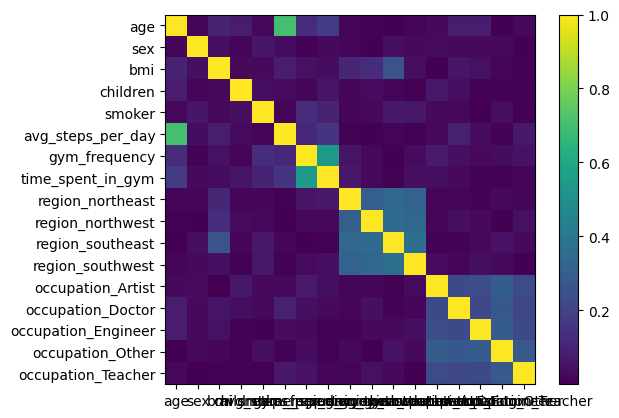

In [226]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.imshow(np.abs(corr_matrix))
plt.colorbar()
plt.xticks(range(X_train_scaled.shape[1]), X_train_scaled.columns)
plt.yticks(range(X_train_scaled.shape[1]), X_train_scaled.columns)
plt.show()

In [227]:
X_train_ols = X_train_scaled.drop('avg_steps_per_day', axis = 1)
print(X_train_ols)

           age  sex       bmi  children  smoker  gym_frequency  \
0     0.304348  0.0  0.366694       0.2     1.0       0.666667   
1     0.934783  0.0  0.163573       0.0     1.0       0.666667   
2     0.021739  1.0  0.232446       0.2     1.0       1.000000   
3     0.043478  0.0  0.227603       0.0     0.0       0.666667   
4     0.173913  0.0  0.168684       0.0     1.0       1.000000   
...        ...  ...       ...       ...     ...            ...   
998   0.195652  1.0  0.270917       0.0     1.0       0.666667   
999   0.521739  1.0  0.538337       0.4     1.0       0.666667   
1000  0.478261  1.0  0.245359       0.0     1.0       0.666667   
1001  0.021739  1.0  0.526500       0.0     1.0       0.666667   
1002  0.326087  0.0  0.068335       0.2     1.0       1.000000   

      time_spent_in_gym  region_northeast  region_northwest  region_southeast  \
0                  0.50               0.0               0.0               1.0   
1                  0.75               0.0    

In [228]:
#10th question
import statsmodels.api as sm

X_train_ols= sm.add_constant(X_train_ols)

model = sm.OLS(y_train,X_train_ols).fit() 
r2 = model.rsquared
print(r2)

0.6153315379930815


In [229]:
#11th question 
import statsmodels.api as sm
ols_lnr = sm.OLS(y_train, X_train_ols)
model_ols = ols_lnr.fit()
 #getting p_value for each column using .pvalue function
p_values = [val for val in model_ols.pvalues]
print(p_values)
#or
#p_values = [val for val in result_ols.pvalues]

# non-significant values which p_value is greater than 0.05 
non_significant_cols = []
for col, pval in zip(X_train_ols.columns, p_values):
  if pval > 0.05:
      non_significant_cols.append(col)
#non_significant_cols = [col for col, pval in zip(X_train_ols.columns, p_values) if pval > 0.05] 
print(non_significant_cols) 

X_train_ols = X_train_ols.drop(non_significant_cols, axis=1)
print(X_train_ols)


[5.279970080417351e-83, 3.65234378190898e-33, 0.5751848411434759, 9.425073369138654e-17, 0.015479839231789975, 1.0210564724090395e-173, 0.035323231980750595, 0.0958864566020479, 1.2481632051919416e-20, 1.8460082332370808e-18, 1.26741547229672e-15, 1.4618445203145584e-12, 0.00015184929444121456, 5.147983176690596e-07, 1.813712923992731e-11, 4.835826601329779e-14, 1.2789229938897865e-13]
['sex', 'time_spent_in_gym']
      const       age       bmi  children  smoker  gym_frequency  \
0       1.0  0.304348  0.366694       0.2     1.0       0.666667   
1       1.0  0.934783  0.163573       0.0     1.0       0.666667   
2       1.0  0.021739  0.232446       0.2     1.0       1.000000   
3       1.0  0.043478  0.227603       0.0     0.0       0.666667   
4       1.0  0.173913  0.168684       0.0     1.0       1.000000   
...     ...       ...       ...       ...     ...            ...   
998     1.0  0.195652  0.270917       0.0     1.0       0.666667   
999     1.0  0.521739  0.538337       

In [230]:
#12th question 
import statsmodels.api as sm 

X_train_ols= sm.add_constant(X_train_ols) 
model = sm.OLS(y_train, X_train_ols).fit() 
print(model.summary2())

r_squared = model.rsquared 
print(format(r_squared, '.3f'))


                         Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.609     
Dependent Variable:       charges              AIC:                    20751.2698
Date:                     2024-04-01 09:18     BIC:                    20815.1096
No. Observations:         1003                 Log-Likelihood:         -10363.   
Df Model:                 12                   F-statistic:            131.3     
Df Residuals:             990                  Prob (F-statistic):     4.47e-195 
R-squared:                0.614                Scale:                  5.5865e+07
---------------------------------------------------------------------------------
                       Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------
const                15135.3644  678.5602  22.3051 0.0000  13803.7828  16466.9460
age                  10694.0167  838.2487

In [231]:
#15th question
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression(fit_intercept = True)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
r2 = r2_score(y_train, y_pred )
print('R2 score:', round(r2, 2))


R2 score: 0.62


In [232]:
#16th question
y_pred2 = model.predict(X_test_scaled)
print(X_test_scaled.shape)
print(y_test.shape)
round(r2_score(y_test, y_pred2),2)

0.7

In [233]:
#18th question
train_score = []
validation_score = []
index = []

for max_iter in [10,100,1000]:
    
        sgd = SGDRegressor(random_state = 0, max_iter = max_iter)
        sgd.fit(X_train_scaled, y_train)
        train_score.append(sgd.score(X_train_scaled, y_train))
        validation_score.append(sgd.score(X_test_scaled, y_test))
        index.append((max_iter))


C:\Users\lokna\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


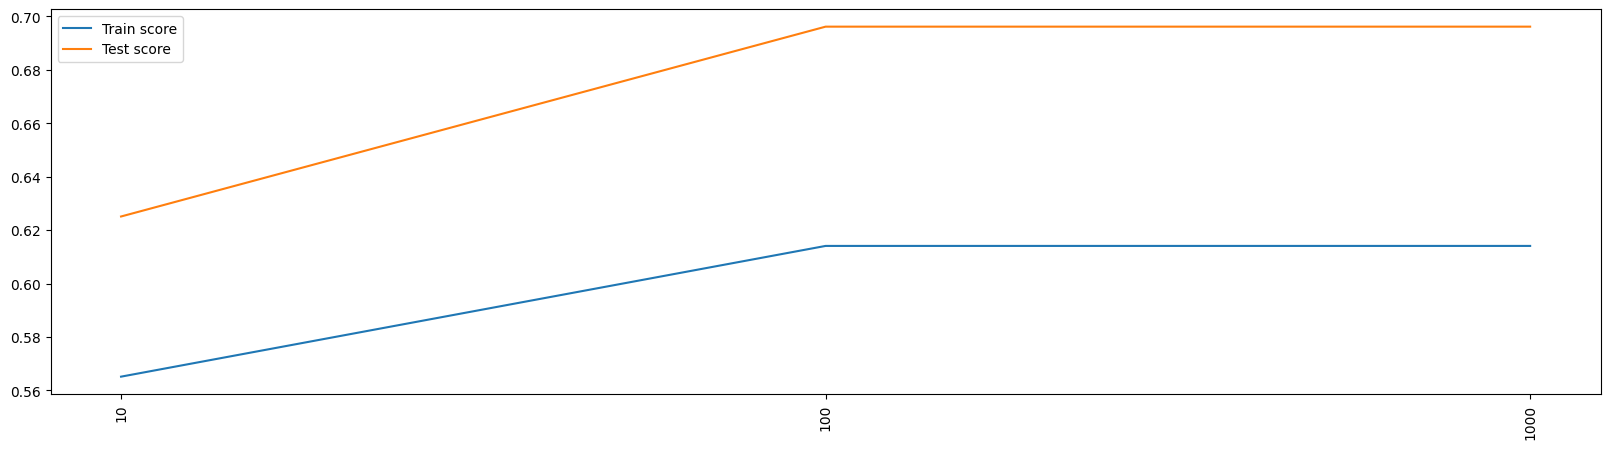

In [234]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train_score, label = 'Train score')
plt.plot(range(len(index)), validation_score, label = 'Test score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.show()

In [235]:
#19th question
from sklearn.linear_model import SGDRegressor

# Create a SGDRegressor model with a specified learning_rate value
sgd_reg = SGDRegressor(learning_rate='adaptive', eta0=0.2, max_iter=1000, random_state=0)

# Fit the model to the training data
sgd_reg.fit(X_train_scaled, y_train) 


# Evaluate the model's performance on the training data
train_score = sgd_reg.score(X_train_scaled, y_train)
test_score = sgd_reg.score(X_test_scaled, y_test)

print(train_score)
print(test_score)

0.6173757314736862
0.7024001346521549


In [236]:
from sklearn.linear_model import SGDRegressor

# Create a SGDRegressor model with a specified learning_rate value
sgd_reg = SGDRegressor(learning_rate='constant', eta0=0.2, max_iter=1000, random_state=0)

# Fit the model to the training data
sgd_reg.fit(X_train_scaled, y_train) 


# Evaluate the model's performance on the training data
train_score = sgd_reg.score(X_train_scaled, y_train)
test_score = sgd_reg.score(X_test_scaled, y_test)

print(train_score)
print(test_score)

0.19882164139058478
0.33946134685353035


In [237]:
from sklearn.linear_model import SGDRegressor

# Create a SGDRegressor model with a specified learning_rate value
sgd_reg = SGDRegressor(learning_rate='optimal', eta0=0.2, max_iter=1000, random_state=0)

# Fit the model to the training data
sgd_reg.fit(X_train_scaled, y_train) 


# Evaluate the model's performance on the training data
train_score = sgd_reg.score(X_train_scaled, y_train)
test_score = sgd_reg.score(X_test_scaled, y_test)

print(train_score)
print(test_score)

-1850437.9977592689
-1430965.563662917


In [238]:
from sklearn.linear_model import SGDRegressor

# Create a SGDRegressor model with a specified learning_rate value
sgd_reg = SGDRegressor(learning_rate='invscaling', eta0=0.2, max_iter=1000, random_state=0)

# Fit the model to the training data
sgd_reg.fit(X_train_scaled, y_train) 


# Evaluate the model's performance on the training data
train_score = sgd_reg.score(X_train_scaled, y_train)
test_score = sgd_reg.score(X_test_scaled, y_test)

print(train_score)
print(test_score)

0.6130723727562541
0.6942736922044577


#19th question
based on the different learning rate the  adaptive is having high score.